## Çalışma

Daha önce X şirketine başvuran 1000 adaydan 100'ü işe alınmış olsun. Her adayın 4 özelliği olsun, ama sadece iki özelliği işe alınma için gerçekten ayırt edici olsun.

Özellikler
 - __Önemli__ : Social Skills, Knowledge in algorithms
 - __Önemsiz__ : GPA, Age
 
Bu özelliklerin tümünün 0 ile 5 arasında değer aldığını kabul ediyoruz. 
 
İşe alınanlar
 - Social Skills ve Knowledge in algorithms 5 üzerinden 5e yakın rastgele sayilar
 - Diğer özellikler GPA, Age önemli değil
 
İşe alınmayanlar ise
 - Social Skills ve Knowledge in algorithms 5 üzerinden 1e yakın rastgele sayilar
 - Diğer özellikler GPA, Age önemli değil

Öncelikle bu veri setini oluşturalım

## Kutuphaneler

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(2019)

## Rastgele sayi uretme

Belirlenen min ve max degeri arasinda ortalaması mu olan, standart sapması 1 olan normal dagilimdan sayi uretme.

In [9]:
def generate(mu = None, minval = 0, maxval = 5):
    # Eger mu None ise, mu degeri minval ve maxval in ortalaması olsun
    if mu == None: 
        mu=(minval+maxval)/2
    
    # val ortalaması mu olan, standart sapması 1 olan normal dagilimdan rastgele sayi 
    val = np.random.normal(loc=mu,scale=1)
    
    # Eger val, maxval'den buyukse veye minval'den kucukse, sayıyı tekrar uret
    while val>maxval or val<minval :
        val = np.random.normal(loc=mu,scale=1)
    return val

## Basarili adaylar

 - Basarili adaylarin onemli ozelliklerini uretelim
 
#### İşe alınan başarılı adayların özellikleri

Yukarıdaki `generate` fonksiyonu ile verimizi olusturalım.

 - Social Skills ve Knowledge in algorithms 5 üzerinden 5e yakın rastgele sayilar
 - Diğer özellikler GPA, Age önemli değil

### Basarisiz Adaylar

#### İşe alınmayan başarısız adayların özellikleri ise
 - Social Skills ve Knowledge in algorithms 5 üzerinden 1e yakın rastgele sayilar
 - Diğer özellikler GPA, Age önemli değil

# Veri Setini olusturalim

Başarılı Adaylar
> Ilk yüz kişi başarılı, 
 - target = 1
 - Social Skills ve Knowledge in algorithms 5 üzerinden 5e yakın rastgele sayilar
 - GPA ve AGE, 0 ve 5 arasinda rastgele sayilar

Başarısız Adaylar
> Geri kalan 900 kişi başarısız
 - target = 0
 - Social Skills ve Knowledge in algorithms 5 üzerinden 1e yakın rastgele sayilar
 - GPA ve AGE, 0 ve 5 arasinda rastgele sayilar

In [20]:
# 1 basarili , 0 basarisiz
target = [1 for i in range(100)] + [0 for i in range(900)]

social_skills = [generate(None,2,5) for i in range(100)] + [generate(None,0,3) for i in range(900)]
algorithm_knowledge = [generate(None,2,5) for i in range(100)] + [generate(None,0,3) for i in range(900)]
GPA = [generate(None,0,5) for i in range(100)] + [generate(None,0,5) for i in range(900)]
Age = [generate(None,0,5) for i in range(100)] + [generate(None,0,5) for i in range(900)]

Veri dictionary'si oluşturalım ardından, verimizi pandas dataframe'e dönüştürelim

In [21]:
datadict = {"social":social_skills, "algorithm":algorithm_knowledge, "gpa":GPA, "age":Age, "y":target}
data = pd.DataFrame.from_dict(datadict)

ilk 7 veri

In [22]:
data.head(7)

,social,algorithm,gpa,age,y
0,2.468269,3.227697,3.179376,2.431196,1
1,3.175003,3.540276,2.244786,1.404903,1
2,2.094020,4.022025,4.043925,1.640956,1
3,4.399757,2.433536,2.886037,2.291038,1
4,2.830749,3.437761,1.383176,1.083624,1
5,2.965654,3.426554,2.473995,3.850980,1
6,4.835768,2.936060,2.954815,3.194945,1


son 7 veri

In [23]:
data.tail(7)

,social,algorithm,gpa,age,y
993,0.933521,0.722243,2.200997,1.891647,0
994,2.460574,2.263457,4.336986,3.303576,0
995,1.461161,2.858184,3.782697,2.334462,0
996,0.443550,0.027143,2.685302,0.836798,0
997,2.578458,0.749091,1.412054,0.146191,0
998,0.618336,0.682618,3.362309,3.358347,0
999,2.998107,2.490219,2.519781,0.540385,0


Veri Özellikleri

In [24]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
social,1000.0,1.757536,0.970452,0.000766,1.021212,1.708486,2.344221,4.986237
algorithm,1000.0,1.705288,0.967771,0.003102,0.983363,1.637078,2.324823,4.927410
gpa,1000.0,2.479954,0.957557,0.015277,1.799917,2.474158,3.166857,4.906796
age,1000.0,2.488929,0.937915,0.146191,1.831484,2.481713,3.152759,4.917141
y,1000.0,0.100000,0.300150,0.000000,0.000000,0.000000,0.000000,1.000000


## Veriyi kaydet

In [25]:
data.to_csv("data.csv", index=False)

## Veriyi Oku

In [26]:
data = pd.read_csv("data.csv")

## Veriyi Ciz

Text(0.5, 1.0, 'Successful Candidates')

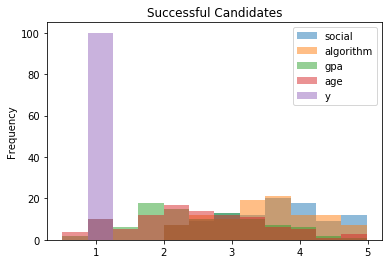

In [27]:
ax = data[data.y == 1].plot.hist(bins=12, alpha=0.5)
plt.title("Successful Candidates")

Text(0.5, 1.0, 'Unsuccessful Candidates')

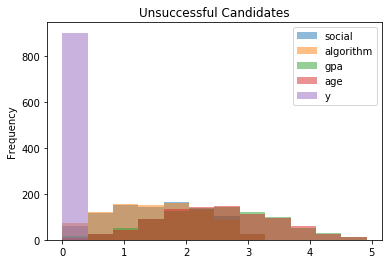

In [28]:
ax = data[data.y==0].plot.hist(bins=12, alpha=0.5)
plt.title("Unsuccessful Candidates")

## Iki boyutlu Cizim
Verinin sadece algoritma ve yas kategorisini cizdir

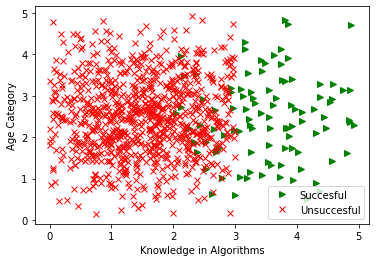

In [29]:
plt.plot(data.algorithm[:100],data.age[:100],">",c="g")
plt.plot(data.algorithm[101:],data.age[101:],"x",c="r")
plt.xlabel("Knowledge in Algorithms")
plt.ylabel("Age Category")
plt.legend(["Succesful","Unsuccesful"])

In [30]:
data.head()

,social,algorithm,gpa,age,y
0,2.468269,3.227697,3.179376,2.431196,1
1,3.175003,3.540276,2.244786,1.404903,1
2,2.094020,4.022025,4.043925,1.640956,1
3,4.399757,2.433536,2.886037,2.291038,1
4,2.830749,3.437761,1.383176,1.083624,1


## Veri Matrisini Olusuturalim

### X 
$[1000, 4]$ boyutlu
 - Verinin ilk 4 kolonu, adaylarin bilgilerini içeriyor

### y 
$[1000, 1]$ boyutlu
 - Verinin son kolonu, kabul ya da red bilgisini içeriyor


In [31]:
# numpy e donustur
M = data.values

# butun colonlar, son y kolonu haric
X = M[:,:4]
y = M[:,-1]

In [15]:
X

array([[4.80696443, 3.34937276, 2.44078869, 0.1392652 ],
       [3.78616101, 3.80841767, 2.0592501 , 0.74239557],
       [4.24793992, 3.99513445, 1.04589396, 2.5903573 ],
       ...,
       [1.79929129, 0.93866854, 3.69852492, 0.05365685],
       [1.61834881, 0.31294892, 0.74537623, 4.5029579 ],
       [1.95347082, 1.26165558, 1.45789506, 0.97476601]])

## Veriyi Normalize et

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# her feature (kolon) normalize ediliyor
scaler.fit(X)
X = scaler.transform(X)
X

array([[0.49493877, 0.6548322 , 0.64685404, 0.47894127],
       [0.63669748, 0.71830876, 0.45579068, 0.26382842],
       [0.41987083, 0.81613973, 0.82359851, 0.31330549],
       ...,
       [0.5170409 , 0.15149126, 0.28555073, 0.        ],
       [0.12387399, 0.13799214, 0.68425213, 0.67327396],
       [0.60121527, 0.50506931, 0.51200946, 0.08262392]])

# [Oklid Temelli] İşe Alım Algoritması

yeni_adaylar matrisindeki adaylari tek tek degerlendirecegiz
 - adayi al
 - nomalize et
 - X matrisi ile Oklid mesafesini hesapla
 - en yakin k = 5 komusuyu bul
 - Bu komusularin yaridan fazlasi kabul almis ise, bu adayi da kabul et yoksa red
 
```
if np.mean(y[benzerler]) > 0.5:
    print("kabul")
else:
    print("red")
```

In [33]:
yeni_adaylar = np.array([[5, 5, 5, 5],
                         [5, 5, 4, 4],
                         [5, 5, 3, 3],
                         [5, 5, 2, 2],
                         [5, 5, 1, 1],
                         [5, 5, 0, 0],
                         [0, 0, 1, 1],
                         [0, 0, 2, 2],
                         [0, 0, 3, 3],
                         [0, 0, 4, 4],
                         [0, 0, 5, 5],
                         [1, 2, 3, 4],
                         [1, 1, 2, 3],
                         [1, 2, 3, 4],
                         [2, 2, 4, 4]])

In [34]:
i = 0
aday = yeni_adaylar[i].reshape(1,-1)
aday = scaler.transform(aday)
aday

array([[1.00276071, 1.01474115, 1.01905418, 1.01736745]])

In [35]:
scaler.inverse_transform(aday)

array([[5., 5., 5., 5.]])

In [36]:
def ise_alim(yeni = 0, k = 5):
    # Yeni aday matrisinden adaylari sec 
    aday = yeni_adaylar[yeni].reshape(1,-1)
    # Transfrom et
    aday = scaler.transform(aday)
    # X ile Farkini al
    D = X-aday
    # Farkin karesi
    D2 = D**2
    # Oklid mesafesini hesapla
    mesafe = np.array([np.sqrt(x[0]+x[1]+x[2]+x[3]) for x in D2])
    # Mesafeleri buyukten kucuge sirala, en kucuk k komsunun indeksi
    k_komsu = mesafe.argsort()[:k]

    if np.mean(y[k_komsu])>0.5: 
        print(scaler.inverse_transform(aday), ">> Kabul")
    else:
        print(scaler.inverse_transform(aday), ">>red")

In [37]:
for i in range(yeni_adaylar.shape[0]):
    ise_alim(yeni = i, k = 5)

[[5. 5. 5. 5.]] >> Kabul
[[5. 5. 4. 4.]] >> Kabul
[[5. 5. 3. 3.]] >> Kabul
[[5. 5. 2. 2.]] >> Kabul
[[5. 5. 1. 1.]] >> Kabul
[[5. 5. 0. 0.]] >> Kabul
[[0. 0. 1. 1.]] >>red
[[0. 0. 2. 2.]] >>red
[[0. 0. 3. 3.]] >>red
[[0. 0. 4. 4.]] >>red
[[0. 0. 5. 5.]] >>red
[[1. 2. 3. 4.]] >>red
[[1. 1. 2. 3.]] >>red
[[1. 2. 3. 4.]] >>red
[[2. 2. 4. 4.]] >>red


# [Korelasyon Temelli] İşe Alım Algoritması

yeni_adaylar matrisindeki adaylari tek tek degerlendirecegiz
 - adayi al, aday vektorunu kendi boyuna bol
 - X matrisini nomalize et, X'teki her bir satır vektörünü kendi boyuna böl 
 - X matrisi ile korelasyon temelli benzerligi hesapla
 - en yakin k = 5 benzer komusuyu bul
 - Bu komusularin yaridan fazlasi kabul almis ise, bu adayi da kabul et yoksa red

In [38]:
yeni_adaylar

array([[5, 5, 5, 5],
       [5, 5, 4, 4],
       [5, 5, 3, 3],
       [5, 5, 2, 2],
       [5, 5, 1, 1],
       [5, 5, 0, 0],
       [0, 0, 1, 1],
       [0, 0, 2, 2],
       [0, 0, 3, 3],
       [0, 0, 4, 4],
       [0, 0, 5, 5],
       [1, 2, 3, 4],
       [1, 1, 2, 3],
       [1, 2, 3, 4],
       [2, 2, 4, 4]])

In [39]:
# vektorunu kendi boyuna bolen anonim fonksiyon
nomalize = lambda X: X/((X**2).sum(axis=1).reshape(X.shape[0],1))**(1/2)

In [40]:
A = nomalize(yeni_adaylar)
A

array([[0.5       , 0.5       , 0.5       , 0.5       ],
       [0.55215763, 0.55215763, 0.4417261 , 0.4417261 ],
       [0.60633906, 0.60633906, 0.36380344, 0.36380344],
       [0.65653216, 0.65653216, 0.26261287, 0.26261287],
       [0.69337525, 0.69337525, 0.13867505, 0.13867505],
       [0.70710678, 0.70710678, 0.        , 0.        ],
       [0.        , 0.        , 0.70710678, 0.70710678],
       [0.        , 0.        , 0.70710678, 0.70710678],
       [0.        , 0.        , 0.70710678, 0.70710678],
       [0.        , 0.        , 0.70710678, 0.70710678],
       [0.        , 0.        , 0.70710678, 0.70710678],
       [0.18257419, 0.36514837, 0.54772256, 0.73029674],
       [0.25819889, 0.25819889, 0.51639778, 0.77459667],
       [0.18257419, 0.36514837, 0.54772256, 0.73029674],
       [0.31622777, 0.31622777, 0.63245553, 0.63245553]])

In [41]:
C = nomalize(X)

In [42]:
C

array([[0.43053221, 0.56961866, 0.5626787 , 0.41661648],
       [0.58153729, 0.65607818, 0.41630332, 0.24097168],
       [0.32999879, 0.64144756, 0.64730982, 0.24624342],
       ...,
       [0.84792699, 0.24843978, 0.46829211, 0.        ],
       [0.12670017, 0.14114043, 0.69986334, 0.6886347 ],
       [0.63889146, 0.53672035, 0.54409542, 0.08780169]])

In [43]:
# C matrisi ile A matrisinin vektör çarpımını al
B = C.dot(A.T)
B

array([[0.98972302, 0.98482117, 0.96270149, ..., 0.87151361, 0.89904486,
        0.93563612],
       [0.94744523, 0.97369435, 0.98953351, ..., 0.72118491, 0.74973913,
        0.80706558],
       [0.9324998 , 0.93109731, 0.91410361, ..., 0.77583506, 0.82884975,
        0.872331  ],
       ...,
       [0.78232944, 0.81222412, 0.83513628, ..., 0.52490569, 0.50202111,
        0.64287555],
       [0.82816932, 0.76122606, 0.66754258, ..., 0.96397817, 0.960908  ,
        0.9628619 ],
       [0.90375446, 0.92824848, 0.94270571, ..., 0.65252223, 0.67476228,
        0.77140792]])

 - en yakin k = 5 benzer komusuyu bul
 - Bu komusularin yaridan fazlasi kabul almis ise, bu adayi da kabul et yoksa red

In [ ]:
alim = lambda a : "Kabul" if a else "Red"

[(yeni_adaylar[i, :], alim((...) > 0.5)) for i in range(A.shape[0])]